In [56]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import os

In [100]:
image_dir = "/analysis/fabiane/documents/publications/MS_CNN_VIS/"

name_template = "LABEL_holdout_idx_IDX_LRP_epsilon_0-001_central_slices.png"
output_name = "individuals_composition_LABEL.png"

label_list = ["HC", "MS"]
idx_lists = {
    "HC" : [19, 3 , 20 , 17],
    "MS" : [6, 4 , 8, 12]
}

plt.rc('font', family='serif')

In [40]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# copy from existing colormap
ncolors = 256
color_array = plt.get_cmap('coolwarm')(range(ncolors))

# create parabolic decrease 
decr = [-1*(x**2)+1 for x in range(int(ncolors/2))]
# normalize
decr = (decr - np.min(decr))/(np.max(decr - np.min(decr)))

# use inverted parabola as increase
incr = np.copy(decr)[::-1]
alphas = np.concatenate((decr, incr))
# update alpha values
color_array[:,-1] = alphas

# create new colormap and register it
transparent_coolwarm = LinearSegmentedColormap.from_list('TransCoWa', color_array)
plt.register_cmap(cmap=transparent_coolwarm)

/analysis/fabiane/documents/publications/MS_CNN_VIS/HC_holdout_idx_19_LRP_epsilon_0-001_central_slices.png
/analysis/fabiane/documents/publications/MS_CNN_VIS/HC_holdout_idx_3_LRP_epsilon_0-001_central_slices.png
/analysis/fabiane/documents/publications/MS_CNN_VIS/HC_holdout_idx_20_LRP_epsilon_0-001_central_slices.png
/analysis/fabiane/documents/publications/MS_CNN_VIS/HC_holdout_idx_17_LRP_epsilon_0-001_central_slices.png


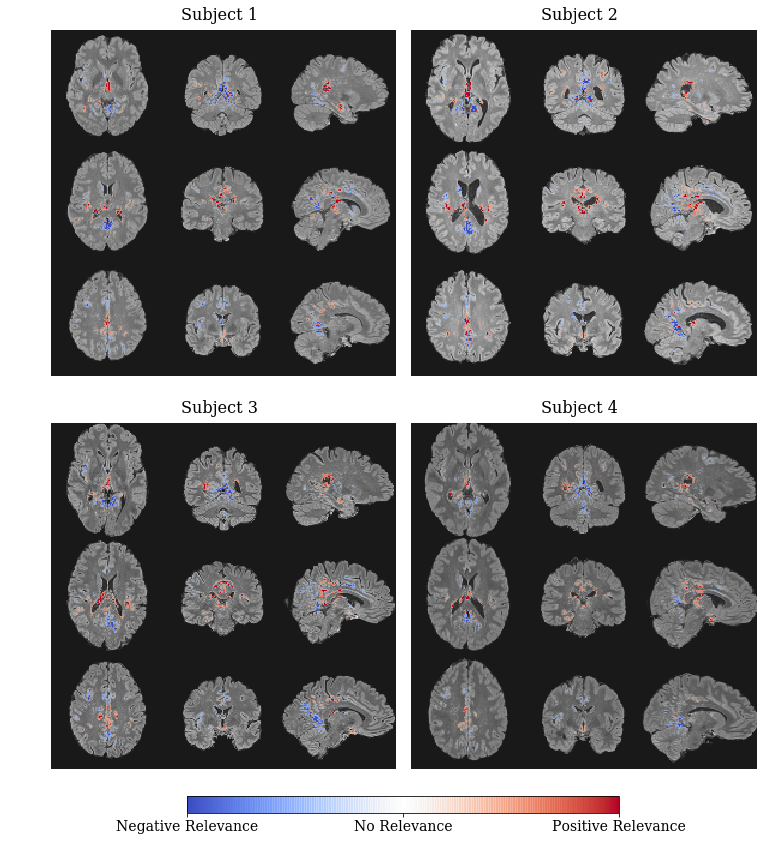

break
/analysis/fabiane/documents/publications/MS_CNN_VIS/MS_holdout_idx_6_LRP_epsilon_0-001_central_slices.png
/analysis/fabiane/documents/publications/MS_CNN_VIS/MS_holdout_idx_4_LRP_epsilon_0-001_central_slices.png
/analysis/fabiane/documents/publications/MS_CNN_VIS/MS_holdout_idx_8_LRP_epsilon_0-001_central_slices.png
/analysis/fabiane/documents/publications/MS_CNN_VIS/MS_holdout_idx_12_LRP_epsilon_0-001_central_slices.png


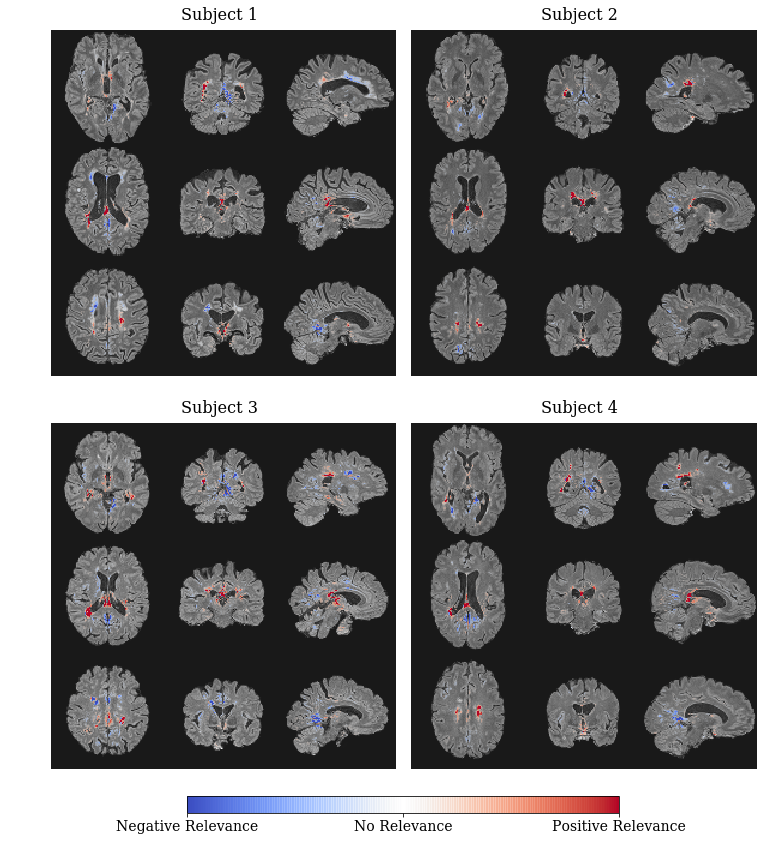

break


In [164]:
for label in label_list:
    #plt.figure(figsize=(4, 18))
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 12))
    for c, image_idx in enumerate(idx_lists[label]):
        #plt.subplot(2, 2, c+1)
        ax = axes.flat[c]
        fn = name_template.replace("LABEL", label).replace("IDX", str(image_idx))
        path = os.path.join(image_dir, fn)
        print(path)
        img = mpimg.imread(path)
        ax.axis("off")
        ax.set_title("Subject {}".format(c+1), fontsize=16)
        im = ax.imshow(img)
    
    vmin = -0.03
    vmax = 0.03
    plt.subplots_adjust(left=0, right=1, top=0.98, bottom=0.07, wspace=0, hspace=0.0)
    cdot_ax = fig.add_axes([0.0, 0.0, 0.05, 0.05])
    im = cdot_ax.imshow(np.zeros(shape=(1, 1)), vmin=vmin, vmax=vmax, cmap='TransCoWa')
    cbar_ax = fig.add_axes([0.205, 0.05, 0.6, 0.02])
    cdot_ax.remove()
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=[vmin, 0, vmax], orientation="horizontal")
    cbar.ax.set_xticklabels(['Negative Relevance', 'No Relevance', 'Positive Relevance'], fontsize=14) 
    # move everthing closely
    #plt.tight_layout()
    
    output_path = os.path.join(image_dir, output_name.replace("LABEL", label))
    plt.savefig(fname=output_path, format='png', transparent=True)
    plt.show()
    print("break")